In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
df_ws = pd.read_csv('data/work-stoppages-monthly-listing-1993-22.csv')
df_ws.head()

,Organizations involved,States,Areas,Ownership,Industry code[1],Union,Union acronym,Union Local,Bargaining unit,Work stoppage beginning date,Work stoppage ending date,Number of workers[2],"Days idle, cumulative for this work stoppage[3]",Note,Unnamed: 14
0,Marine Towing and Transportation Employers' As...,NY,New York,Private industry,488330,International Longshoremen's Association,ILA,NaN,NaN,2/16/88,12/20/93,"2,500","2,879,500","The number of workers decreased to 2,000 in De...",NaN
1,Boeing Company,WA,Seattle,Private industry,336411,Seattle Professional Engineering Employees Ass...,SPEEA,NaN,NaN,1/19/93,1/19/93,"21,000","21,000",The union name was changed to the Society of P...,NaN
2,Boston Gas Company,MA,Boston,Private industry,22121,United Steelworkers,USW,12003,NaN,1/24/93,5/20/93,"1,000","83,000","Boston Gas Company also does business as ""Nati...",NaN
3,Bituminous Coal Operators Association,"IN, IL, KY, WV",Multiple states,Private industry,212112,United Mine Workers of America,UMWA,NaN,NaN,2/2/93,3/2/93,"6,700","103,400","Number of workers involved increased from 5,00...",NaN
4,Douglas Aircraft,CA,NaN,Private industry,336411,International Association of Machinists,IAM,NaN,NaN,3/2/93,3/3/93,"6,800","13,600",NaN,NaN


In [3]:
#lowercase column names
df_ws.columns = df_ws.columns.str.lower()
#replace spaces with underscores in column names
df_ws.columns = df_ws.columns.str.replace(' ', '_')
df_ws.head()


,organizations_involved,states,areas,ownership,industry_code[1],union,union_acronym,union_local,bargaining_unit,work_stoppage_beginning_date,work_stoppage_ending_date,number_of_workers[2],"days_idle,_cumulative_for_this_work_stoppage[3]",note,unnamed:_14
0,Marine Towing and Transportation Employers' As...,NY,New York,Private industry,488330,International Longshoremen's Association,ILA,NaN,NaN,2/16/88,12/20/93,"2,500","2,879,500","The number of workers decreased to 2,000 in De...",NaN
1,Boeing Company,WA,Seattle,Private industry,336411,Seattle Professional Engineering Employees Ass...,SPEEA,NaN,NaN,1/19/93,1/19/93,"21,000","21,000",The union name was changed to the Society of P...,NaN
2,Boston Gas Company,MA,Boston,Private industry,22121,United Steelworkers,USW,12003,NaN,1/24/93,5/20/93,"1,000","83,000","Boston Gas Company also does business as ""Nati...",NaN
3,Bituminous Coal Operators Association,"IN, IL, KY, WV",Multiple states,Private industry,212112,United Mine Workers of America,UMWA,NaN,NaN,2/2/93,3/2/93,"6,700","103,400","Number of workers involved increased from 5,00...",NaN
4,Douglas Aircraft,CA,NaN,Private industry,336411,International Association of Machinists,IAM,NaN,NaN,3/2/93,3/3/93,"6,800","13,600",NaN,NaN


In [4]:
df_ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   organizations_involved                           635 non-null    object 
 1   states                                           628 non-null    object 
 2   areas                                            587 non-null    object 
 3   ownership                                        629 non-null    object 
 4   industry_code[1]                                 629 non-null    object 
 5   union                                            628 non-null    object 
 6   union_acronym                                    574 non-null    object 
 7   union_local                                      205 non-null    object 
 8   bargaining_unit                                  20 non-null     object 
 9   work_stoppage_beginning_date    

In [6]:
# convert work stoppage beginning date to datetime
df_ws['work_stoppage_beginning_date'] = pd.to_datetime(df_ws['work_stoppage_beginning_date'])
#convert work stoppage ending date to datetime
df_ws['work_stoppage_ending_date'] = pd.to_datetime(df_ws['work_stoppage_ending_date'])
df_ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   organizations_involved                           635 non-null    object        
 1   states                                           628 non-null    object        
 2   areas                                            587 non-null    object        
 3   ownership                                        629 non-null    object        
 4   industry_code[1]                                 629 non-null    object        
 5   union                                            628 non-null    object        
 6   union_acronym                                    574 non-null    object        
 7   union_local                                      205 non-null    object        
 8   bargaining_unit                         

In [7]:
# create new column for year
df_ws['year'] = df_ws['work_stoppage_beginning_date'].dt.year
df_ws.head()

,organizations_involved,states,areas,ownership,industry_code[1],union,union_acronym,union_local,bargaining_unit,work_stoppage_beginning_date,work_stoppage_ending_date,number_of_workers[2],"days_idle,_cumulative_for_this_work_stoppage[3]",note,unnamed:_14,year
0,Marine Towing and Transportation Employers' As...,NY,New York,Private industry,488330,International Longshoremen's Association,ILA,NaN,NaN,1988-02-16,1993-12-20,"2,500","2,879,500","The number of workers decreased to 2,000 in De...",NaN,1988.0
1,Boeing Company,WA,Seattle,Private industry,336411,Seattle Professional Engineering Employees Ass...,SPEEA,NaN,NaN,1993-01-19,1993-01-19,"21,000","21,000",The union name was changed to the Society of P...,NaN,1993.0
2,Boston Gas Company,MA,Boston,Private industry,22121,United Steelworkers,USW,12003,NaN,1993-01-24,1993-05-20,"1,000","83,000","Boston Gas Company also does business as ""Nati...",NaN,1993.0
3,Bituminous Coal Operators Association,"IN, IL, KY, WV",Multiple states,Private industry,212112,United Mine Workers of America,UMWA,NaN,NaN,1993-02-02,1993-03-02,"6,700","103,400","Number of workers involved increased from 5,00...",NaN,1993.0
4,Douglas Aircraft,CA,NaN,Private industry,336411,International Association of Machinists,IAM,NaN,NaN,1993-03-02,1993-03-03,"6,800","13,600",NaN,NaN,1993.0


In [8]:
# change year column to datetime
df_ws['year'] = pd.to_datetime(df_ws['year'], format='%Y')
df_ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   organizations_involved                           635 non-null    object        
 1   states                                           628 non-null    object        
 2   areas                                            587 non-null    object        
 3   ownership                                        629 non-null    object        
 4   industry_code[1]                                 629 non-null    object        
 5   union                                            628 non-null    object        
 6   union_acronym                                    574 non-null    object        
 7   union_local                                      205 non-null    object        
 8   bargaining_unit                         

In [9]:
# convert state abbreviation to full name
df_ws['state'] = df_ws['states'].map(
{"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota",
 "OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"}
)

df_ws.head()

,organizations_involved,states,areas,ownership,industry_code[1],union,union_acronym,union_local,bargaining_unit,work_stoppage_beginning_date,work_stoppage_ending_date,number_of_workers[2],"days_idle,_cumulative_for_this_work_stoppage[3]",note,unnamed:_14,year,state
0,Marine Towing and Transportation Employers' As...,NY,New York,Private industry,488330,International Longshoremen's Association,ILA,NaN,NaN,1988-02-16,1993-12-20,"2,500","2,879,500","The number of workers decreased to 2,000 in De...",NaN,1988-01-01,New York
1,Boeing Company,WA,Seattle,Private industry,336411,Seattle Professional Engineering Employees Ass...,SPEEA,NaN,NaN,1993-01-19,1993-01-19,"21,000","21,000",The union name was changed to the Society of P...,NaN,1993-01-01,Washington
2,Boston Gas Company,MA,Boston,Private industry,22121,United Steelworkers,USW,12003,NaN,1993-01-24,1993-05-20,"1,000","83,000","Boston Gas Company also does business as ""Nati...",NaN,1993-01-01,Massachusetts
3,Bituminous Coal Operators Association,"IN, IL, KY, WV",Multiple states,Private industry,212112,United Mine Workers of America,UMWA,NaN,NaN,1993-02-02,1993-03-02,"6,700","103,400","Number of workers involved increased from 5,00...",NaN,1993-01-01,NaN
4,Douglas Aircraft,CA,NaN,Private industry,336411,International Association of Machinists,IAM,NaN,NaN,1993-03-02,1993-03-03,"6,800","13,600",NaN,NaN,1993-01-01,California


In [10]:
# Filter data between two dates
ws_08_22 = df_ws.loc[(df_ws['year'] >= '2008-01-01')
                     & (df_ws['year'] < '2022-12-31')]
ws_08_22.head()

,organizations_involved,states,areas,ownership,industry_code[1],union,union_acronym,union_local,bargaining_unit,work_stoppage_beginning_date,work_stoppage_ending_date,number_of_workers[2],"days_idle,_cumulative_for_this_work_stoppage[3]",note,unnamed:_14,year,state
409,Volvo Trucks North America,VA,Dublin,Private industry,336120,United Automobile Workers,UAW,2069,NaN,2008-02-01,2008-03-17,"2,500","77,500",NaN,NaN,2008-01-01,Virginia
410,"American Axel and Manufacturing, Inc.","NY, MI","Cheektowaga and Tonawanda, NY; Detroit, Hamtra...",Private industry,336350,United Automobile Workers,UAW,"235, 262, 424, 846, 2093",NaN,2008-02-26,2008-05-22,"3,600","226,800",NaN,NaN,2008-01-01,NaN
411,Sutter Hospitals,CA,San Francisco Bay Area,Private industry,622110,California Nurses Association,CNA,NaN,NaN,2008-03-21,2008-03-30,"4,000","24,000",NaN,NaN,2008-01-01,California
412,University of Michigan,MI,Ann Arbor,State government,611310,Graduate Employees Organization,NaN,NaN,NaN,2008-03-25,2008-03-25,"1,700","1,700",NaN,NaN,2008-01-01,Michigan
413,General Motors Corporation,MI,Lansing,Private industry,336111,United Automobile Workers,UAW,602,NaN,2008-04-17,2008-05-16,"2,300","50,600",NaN,NaN,2008-01-01,Michigan


In [11]:
ws_08_22.tail()

,organizations_involved,states,areas,ownership,industry_code[1],union,union_acronym,union_local,bargaining_unit,work_stoppage_beginning_date,work_stoppage_ending_date,number_of_workers[2],"days_idle,_cumulative_for_this_work_stoppage[3]",note,unnamed:_14,year,state
624,Sutter Health Hospitals,CA,Berkeley,Private industry,622110,California Nurses Association/National Nurses ...,CNA/NNU,NaN,NaN,2022-10-24,2022-10-29,"1,800","9,000",NaN,NaN,2022-01-01,California
625,University of California,CA,Statewide,State government,61131,United Auto Workers,UAW,"Local 2865, 5810",NaN,2022-11-14,2022-12-23,"48,000","1,272,000","48,000 workers from 11/14-12/11. Number droppe...",NaN,2022-01-01,California
626,The New School,NY,NY,Private industry,61131,Academics Come Together - United Auto Workers,ACT-UAW,Local 7902,NaN,2022-11-16,2022-12-10,"1,700","28,900",NaN,NaN,2022-01-01,New York
627,New York Times,NY,NY,Private industry,511110,The NewsGuild,TNG-CWA,NaN,NaN,2022-12-08,2022-12-08,"1,100","1,100",NaN,NaN,2022-01-01,New York
628,Alta Bates Summit,CA,Oakland and Berkeley,Private industry,622110,California Nurses Association/National Nurses ...,NNU,NaN,NaN,2022-12-24,2023-01-01,"1,800","7,200",NaN,NaN,2022-01-01,California


In [16]:
# transform the data to get the number of work stoppages per year per state  


ws_st_yr = ws_08_22.groupby(['year', 'state']).size().reset_index(name='counts')
ws_st_yr.head(10)

,year,state,counts
0,2008-01-01,California,5
1,2008-01-01,Indiana,1
2,2008-01-01,Kansas,1
3,2008-01-01,Michigan,2
4,2008-01-01,Missouri,1
5,2008-01-01,Virginia,1
6,2008-01-01,Washington,1
7,2009-01-01,Illinois,1
8,2009-01-01,New York,1
9,2009-01-01,Pennsylvania,1


In [17]:
ws_st_yr.head(30)

,year,state,counts
0,2008-01-01,California,5
1,2008-01-01,Indiana,1
2,2008-01-01,Kansas,1
3,2008-01-01,Michigan,2
4,2008-01-01,Missouri,1
5,2008-01-01,Virginia,1
6,2008-01-01,Washington,1
7,2009-01-01,Illinois,1
8,2009-01-01,New York,1
9,2009-01-01,Pennsylvania,1


In [20]:
ws_st_yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    107 non-null    datetime64[ns]
 1   state   107 non-null    object        
 2   counts  107 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.6+ KB


In [21]:
#convert year column to integer
ws_st_yr['year'] = ws_st_yr['year'].dt.year
ws_st_yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    107 non-null    int64 
 1   state   107 non-null    object
 2   counts  107 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [22]:
#save ws_st_yr to csv
ws_st_yr.to_csv('data/ws_st_yr.csv', index=False)

In [19]:
#group by year and state to get the total number of work stoppages per state
ws_st = ws_st_yr.groupby(['state']).sum().reset_index()
ws_st.head(10)

/var/folders/wc/8hdh58ld0ydc_xf_g99n5yr80000gn/T/ipykernel_96305/2674744382.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ws_st = ws_st_yr.groupby(['state']).sum().reset_index()


,state,counts
0,Alabama,2
1,Arizona,1
2,California,70
3,Colorado,3
4,Hawaii,2
5,Illinois,18
6,Indiana,1
7,Kansas,1
8,Kentucky,2
9,Maine,1


In [20]:
# group number of workers involved in work stoppages by year
workers_yr = ws_08_22.groupby(['year','number_of_workers[2]']).size().reset_index(name='counts')
workers_yr.tail()


,year,number_of_workers[2],counts
178,2022-01-01,"4,500",2
179,2022-01-01,"4,600",1
180,2022-01-01,"48,000",1
181,2022-01-01,"5,000",1
182,2022-01-01,"8,000",2


In [21]:
workers_yr.head()

,year,number_of_workers[2],counts
0,2008-01-01,"1,200",1
1,2008-01-01,"1,300",1
2,2008-01-01,"1,700",1
3,2008-01-01,"1,800",2
4,2008-01-01,"2,300",1


In [22]:
# drop counts column from workers_yr
workers_yr = workers_yr.drop(columns=['counts'])
workers_yr.head()

,year,number_of_workers[2]
0,2008-01-01,"1,200"
1,2008-01-01,"1,300"
2,2008-01-01,"1,700"
3,2008-01-01,"1,800"
4,2008-01-01,"2,300"


In [23]:
# renaame number_of_workers[2] column workers
workers_yr = workers_yr.rename(columns={'number_of_workers[2]':'workers'})

In [24]:
workers_yr.head()

,year,workers
0,2008-01-01,"1,200"
1,2008-01-01,"1,300"
2,2008-01-01,"1,700"
3,2008-01-01,"1,800"
4,2008-01-01,"2,300"


In [39]:
# group number workers by year
workers_byyr = workers_yr.groupby(['year']).sum().reset_index()
workers_byyr.head()


#workers_byyr = workers_yr.groupby(['workers']).size().reset_index(name='worker_count')
#workers_byyr.head()


,year,workers
0,2008-01-01,"1,2001,3001,7001,8002,3002,4002,5002,90027,000..."
1,2009-01-01,"1,1001,5001,9002,5005,500"
2,2010-01-01,"1,1001,5001,7001,80012,00015,0002,5004,500"
3,2011-01-01,"1,0001,1001,3001,5001,9002,0002,50029,0003,000..."
4,2012-01-01,"1,1001,3001,90014,00021,00021,20026,5003,3003,..."


In [42]:
workers_yr['workers'].dtype

dtype('O')

In [43]:
workers_yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   year     183 non-null    datetime64[ns]
 1   workers  183 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 3.0+ KB


In [47]:
# convert workers column to numeric remove comma
workers_yr['workers'] = pd.to_numeric(workers_yr['workers'].str.replace(',', ''))

In [48]:
workers_yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   year     183 non-null    datetime64[ns]
 1   workers  183 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [49]:
# group number workers by year
workers_byyr = workers_yr.groupby(['year']).sum().reset_index()
workers_byyr.head()

,year,workers
0,2008-01-01,70400
1,2009-01-01,12500
2,2010-01-01,40100
3,2011-01-01,94300
4,2012-01-01,133600


In [50]:
workers_byyr.tail()

,year,workers
10,2018-01-01,482800
11,2019-01-01,423700
12,2020-01-01,24000
13,2021-01-01,71900
14,2022-01-01,95400


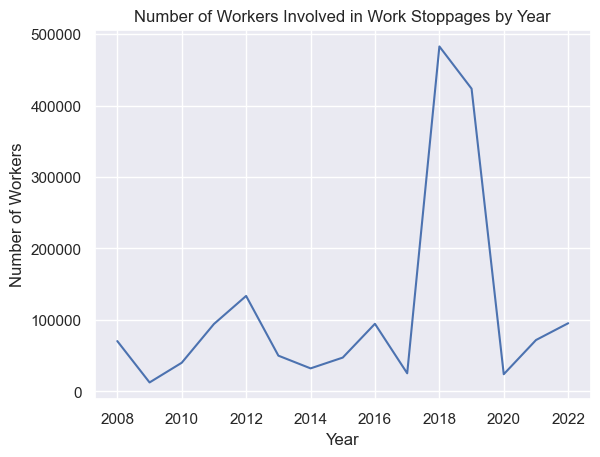

In [51]:
# seaborn line plot number of workers involved in work stoppages by year
sns.lineplot(data=workers_byyr, x="year", y="workers")
plt.title('Number of Workers Involved in Work Stoppages by Year')
plt.xlabel('Year')
plt.ylabel('Number of Workers')
plt.show()

In [52]:
# group number of work stoppages by state
ws_state = ws_08_22.groupby(['state']).size().reset_index(name='counts')
ws_state.head()

,state,counts
0,Alabama,2
1,Arizona,1
2,California,70
3,Colorado,3
4,Hawaii,2


<AxesSubplot: xlabel='counts', ylabel='state'>

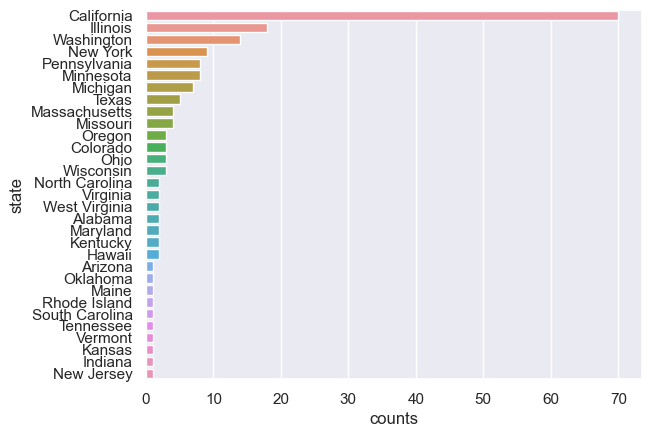

In [53]:
# plot with seaborn a horizontal bar chart number of work stoppages by state sorted descending
sns.barplot(x="counts", y="state", data=ws_state.sort_values(by='counts', ascending=False))

In [54]:
# save ws_state as csv
ws_state.to_csv('/Users/erinmurphy/Documents/GitHub/union-viz/data/ws_state.csv', index=False)